In [3]:
import sys
import os

os.chdir(os.path.join(sys.path[0], ".."))
import logging

logger = logging.getLogger()
logger.disabled = True

In [21]:
from memory.environment.generator import OQAGenerator
gen_params = {
    "max_history": 1024,
    "semantic_knowledge_path": "./data/semantic-knowledge.json",
    "names_path": "./data/top-human-names",
    "weighting_mode": "weighted",
    "commonsense_prob": 0.5,
    "time_start_at": 0,
    "limits": {
        "heads": None,
        "tails": None,
        "names": None,
        "allow_spaces": True,
    },
    "disjoint_entities": True,
}

oqag = OQAGenerator(**gen_params)

len(oqag.heads), len(oqag.tails), len(oqag.names)

(66, 485, 20)

In [5]:
from memory.utils import read_yaml

config = read_yaml('./train_RL.yaml')
config['generator_params']

{'max_history': 1024,
 'semantic_knowledge_path': './data/semantic-knowledge.json',
 'names_path': './data/top-human-names',
 'weighting_mode': 'weighted',
 'commonsense_prob': 0.5,
 'time_start_at': 0,
 'limits': {'heads': None, 'tails': None, 'names': None, 'allow_spaces': True},
 'disjoint_entities': True}

In [4]:
from memory.environment.generator import OQAGenerator

oqag  = OQAGenerator()

len(oqag.heads), len(oqag.tails)

(56, 236)

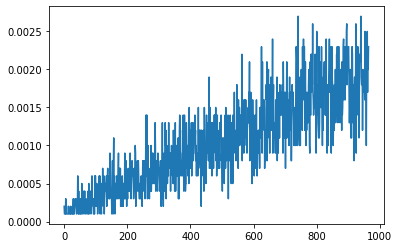

In [23]:
import random
import matplotlib.pyplot as plt
from collections import Counter

foo = [foo for foo in range(0, 1024)]
weights1 = foo
weights2 = [bar ** 2 for bar in foo]

num_to_sample = 10000

samples1 = [
    val / num_to_sample
    for key, val in sorted(
        dict(Counter(random.choices(foo, k=num_to_sample, weights=weights1))).items()
    )
]

samples2 = [val / num_to_sample
    for key, val in sorted(
        dict(Counter(random.choices(foo, k=num_to_sample, weights=weights2))).items()
    )
]


plt.figure()
plt.plot(samples1)
# plt.plot(samples2)


In [187]:
len(samples1), len(samples2)

(128, 123)

In [191]:
samples2

[(5, 1),
 (8, 1),
 (9, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 3),
 (16, 7),
 (17, 10),
 (18, 7),
 (19, 5),
 (20, 8),
 (21, 4),
 (22, 9),
 (23, 5),
 (24, 7),
 (25, 11),
 (26, 8),
 (27, 8),
 (28, 10),
 (29, 6),
 (30, 11),
 (31, 13),
 (32, 18),
 (33, 16),
 (34, 14),
 (35, 14),
 (36, 18),
 (37, 15),
 (38, 21),
 (39, 30),
 (40, 33),
 (41, 21),
 (42, 21),
 (43, 21),
 (44, 22),
 (45, 25),
 (46, 24),
 (47, 32),
 (48, 26),
 (49, 30),
 (50, 35),
 (51, 32),
 (52, 42),
 (53, 45),
 (54, 44),
 (55, 42),
 (56, 47),
 (57, 54),
 (58, 55),
 (59, 61),
 (60, 48),
 (61, 47),
 (62, 52),
 (63, 62),
 (64, 53),
 (65, 59),
 (66, 57),
 (67, 53),
 (68, 58),
 (69, 64),
 (70, 68),
 (71, 62),
 (72, 85),
 (73, 63),
 (74, 64),
 (75, 65),
 (76, 80),
 (77, 76),
 (78, 94),
 (79, 107),
 (80, 107),
 (81, 83),
 (82, 104),
 (83, 101),
 (84, 87),
 (85, 107),
 (86, 79),
 (87, 100),
 (88, 84),
 (89, 109),
 (90, 116),
 (91, 116),
 (92, 104),
 (93, 110),
 (94, 140),
 (95, 126),
 (96, 132),
 (97, 157),
 (98, 133),
 (99, 137),
 (1

In [87]:
Counter(random.choices(foo, k=100, weights=[2*bar for bar in foo]))

Counter({5: 13, 6: 13, 8: 14, 3: 11, 9: 23, 4: 9, 7: 14, 2: 3})

In [86]:
[2*bar for bar in foo]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [80]:
foo

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
from torch.distributions import Categorical

probs = torch.tensor([1,2,3,4])
m = Categorical(probs)
action = m.sample()

m, action, m.log_prob(torch.tensor(action))

/home/tk/.virtualenvs/dev-python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


(Categorical(probs: torch.Size([4]), logits: torch.Size([4])),
 tensor(3),
 tensor(-0.9163))

In [32]:
import torch

bar = torch.tensor([[1]]) + torch.tensor([2])

In [33]:
bar, bar.shape

(tensor([[3]]), torch.Size([1, 1]))

In [20]:
from memory.utils import read_yaml

config = read_yaml("./train_RL.yaml")
from memory.model import Embeddings


embs = Embeddings(
    generator_params=config["generator_params"],
    embedding_dim=4,
    num_rows=129,
    num_cols=6,
)


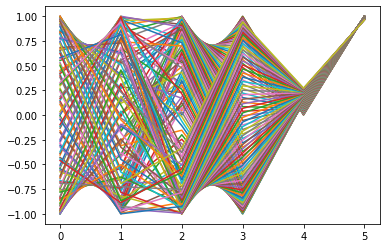

In [23]:

import matplotlib.pyplot as plt
plt.figure()

for emb in embs.positional_embeddings.weight:
    plt.plot(emb)

In [50]:
import torch
import numpy as np
def position_encoding_init(n_position, d_pos_vec):
    ''' Init the sinusoid position encoding table '''

    # keep dim 0 for padding token position encoding zero vector
    position_enc = np.array([
        [pos / np.power(10000, 2*(i//2) / d_pos_vec) for i in range(d_pos_vec)]
        if pos != 0 else np.zeros(d_pos_vec) for pos in range(n_position)])

    position_enc[1:, 0::2] = np.sin(position_enc[1:, 0::2]) # dim 2i
    position_enc[1:, 1::2] = np.cos(position_enc[1:, 1::2]) # dim 2i+1
    return torch.from_numpy(position_enc).type(torch.float32)

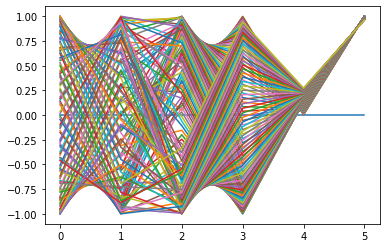

In [51]:
import matplotlib.pyplot as plt
plt.figure()

for row in position_encoding_init(129, 6):
    plt.plot(row)